In [55]:
#Version1, check up Ver2 after that

In [56]:
def plot_accuracy_loss(history):
    fig=plt.figure(figsize=(20,10))
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label='acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label='val_acc')
    plt.title('train_acc VS val_acc')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.rcParams['axes.facecolor'] = 'white'
    plt.legend(fontsize = "large")    
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label='loss')
    plt.plot(history.history['val_loss'], 'ro--', label='val_loss')
    plt.title('train_loss VS val_loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.rcParams['axes.facecolor'] = 'white'
    plt.legend()    
    plt.show()

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
import os
from sklearn.utils import shuffle
from keras.utils import to_categorical
tf.__version__
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, Concatenate, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
directory=os.path.abspath("")
print(directory)

C:\Users\Owner\Desktop\my folder\Ogul\week13\dataset


In [59]:
class_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes=len(class_names)
image_size=(48,48)
class_names_numbers = a1D = np.array([0, 1, 2, 3, 4, 5, 6, 7])
print(class_names_label)

{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}


In [60]:
def load_data():
#here we will loop in each folder our files and fill two arrays
#images - images
#labels - Gesture name as a folder name of image storage
    category=['train','validation']
    output=[]
    for eachcategory in category:
        path=os.path.join(directory,eachcategory)
        images=[]
        labels=[]
       
        for folder in os.listdir(path):
            label=class_names_label[folder]
            for file in os.listdir(os.path.join(path, folder)):
                img_path=os.path.join(os.path.join(path,folder),file)
                image=cv2.imread(img_path)
                image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image=cv2.resize(image,image_size)
                
                images.append(image)
                labels.append(label)
        images=np.array(images, dtype='float32')
        labels=np.array(labels, dtype='int32')
        
        output.append((images,labels))
    return output

In [61]:
(train_images, train_labels), (test_images, test_labels) = load_data()
#yeap, I will use given Validation folder as test dataset

In [62]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=11)

print(len(train_images))
print(len(test_images))

28723
3589


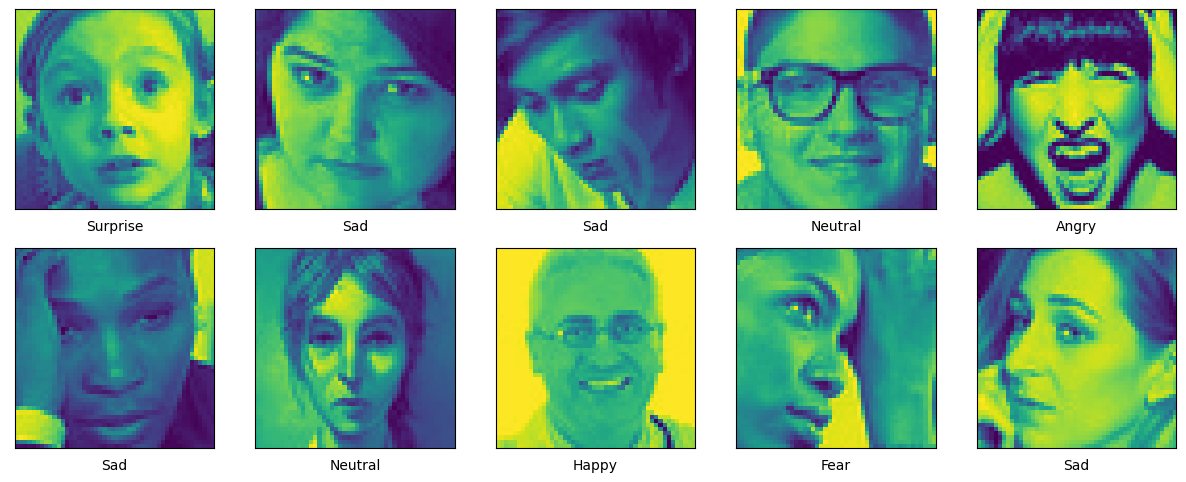

In [63]:
def display_example(class_name, images, labels):
    figsize=(15,15)
    fig=plt.figure(figsize=figsize)
    #fig.subtitle("Some examples of images from the datset", fontsize=16) - deprecated?
    for i in range(10):
        plt.subplot(5,5, i+1)
        plt.yticks([])
        plt.xticks([])
        plt.grid(False)
        #image=cv2.resize(images[i], figsize)
        #plt.imshow(image.astype(np.uint8))
        plt.imshow(images[i].astype(np.uint8))
        plt.xlabel(class_names[labels[i]],fontsize = 10)
    plt.show()

display_example(class_names,train_images,train_labels)

In [64]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [65]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(28723, 48, 48)
(28723, 7)
(3589, 48, 48)
(3589, 7)


In [66]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import h5py
erl_stop = EarlyStopping(monitor='val_loss', patience = 5, restore_best_weights=True)

In [70]:
model = Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (48, 48, 1)),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(7, activation='softmax')
    ])

In [71]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
history=model.fit(train_images, train_labels, batch_size=32, epochs=100, validation_split=0.2, callbacks=[erl_stop])

Epoch 1/100
719/719 [==============================] - 45s 61ms/step - loss: 1.7266 - accuracy: 0.3046 - val_loss: 1.5655 - val_accuracy: 0.3904
Epoch 2/100
719/719 [==============================] - 43s 59ms/step - loss: 1.5415 - accuracy: 0.4042 - val_loss: 1.4422 - val_accuracy: 0.4423
Epoch 3/100
719/719 [==============================] - 43s 60ms/step - loss: 1.4562 - accuracy: 0.4378 - val_loss: 1.4147 - val_accuracy: 0.4552
Epoch 4/100
719/719 [==============================] - 48s 67ms/step - loss: 1.4061 - accuracy: 0.4603 - val_loss: 1.3651 - val_accuracy: 0.4696
Epoch 5/100
719/719 [==============================] - 48s 67ms/step - loss: 1.3627 - accuracy: 0.4798 - val_loss: 1.3576 - val_accuracy: 0.4700
Epoch 6/100
719/719 [==============================] - 51s 70ms/step - loss: 1.3301 - accuracy: 0.4929 - val_loss: 1.3417 - val_accuracy: 0.4811
Epoch 7/100
719/719 [==============================] - 53s 74ms/step - loss: 1.2958 - accuracy: 0.5037 - val_loss: 1.3540 - val_ac

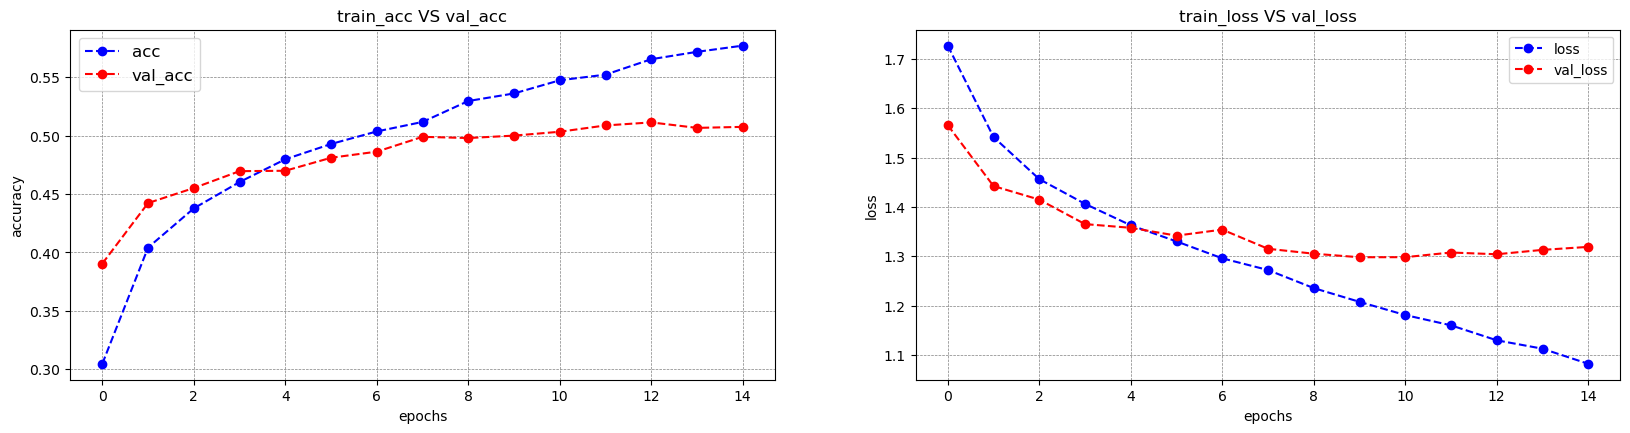

In [73]:
plot_accuracy_loss(history)

In [74]:
model.save(directory + '/version1.h5')

In [75]:
model_json = model.to_json()
with open(directory + '/version1.json','w') as json_file:
  json_file.write(model_json)

In [76]:
import cv2

facec = cv2.CascadeClassifier(directory + '/haarcascade_frontalface_default.xml')
with open(directory + '/version1.json', 'r') as json_file:
  json_saved_model = json_file.read()
model = tf.keras.models.model_from_json(json_saved_model)
model.load_weights(directory + '/version1.h5')
model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [77]:
import cv2
face_detector = cv2.CascadeClassifier(directory + '/haarcascade_frontalface_default.xml')  #usual facedetection
width, height = 48, 48
font = cv2.FONT_HERSHEY_SIMPLEX
camera = cv2.VideoCapture(0)

while (True):
    connected, image = camera.read()
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.5, minSize=(30,30))
    for (x, y, w, h) in detections:
        image_face = cv2.resize(image_gray[y:y + w, x:x + h], (width, height))
        image_face = image_face / 255
        image_face = image_face.reshape(-1, 48, 48, 1)
        predictions = model.predict(image_face)
        prediction = class_names[np.argmax(predictions)]
            
        cv2.rectangle(image, (x, y), (x + w, y + h), (255,0,0), 1)
        cv2.putText(image, prediction, (x,y +(w+30)), font, 1, (0,0,255))
    cv2.imshow("Face", image)
    if cv2.waitKey(1) == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step
